<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #10e02c;"> <a href="#part0" style="color:#d910e0; text-decoration:none;">Checking the Distribution Data for Normality</a></p>

<p id="part0"></p>
<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #FF8C00;"> <a href="#part0" style="color:#FF8C00; text-decoration:none;">TABLE OF CONTENT</a></p>


<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #0099FF; line-height:1.3"><a href="#part1" style="color:#808080; text-decoration:none;">Importing libraries</a></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #808080; line-height:1.3"><a href="#part2" style="color:#808080; text-decoration:none;">Перевірка розподілу на нормальність</a></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #808080; line-height:1.3"><a href="#part3" style="color:#808080; text-decoration:none;">QQ-Plot</a></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #808080; line-height:1.3"><a href="#part4" style="color:#808080; text-decoration:none;">U-критерій Манна-Уітні</a></p>


<p id="part1"></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">Importing libraries</p>

<p style="text-align: right;"><a href="#part0" style="color:lime; text-decoration:none;">зміст</a></p>

In [32]:
import numpy as np
import pandas as pd
import pylab 

import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import anderson, kstest, shapiro
from statsmodels.stats.diagnostic import lilliefors

In [33]:
# https://stackoverflow.com/questions/20124877/css-styling-of-html-in-ipython-notebook-output
# CSS стилі для HTML верстки блокноту:

In [34]:
%%html
<style>
    a:hover {
      background-color: #0099FF;
    }
</style>

<p id="part2"></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">Перевірка розподілу на нормальність</p>

<p style="text-align: right;"><a href="#part0" style="color:lime; text-decoration:none;">зміст</a></p>

(K-S test) - *Критерій Колмогорова-Смирнова* обчислюється при
відомому середньому і середньоквадратичному відхиленні генеральної
сукупності. Якщо обчислена D-статистика значуща, то гіпотеза про те, що дані
мають нормальний розподіл, відкидається.

*Критерій Ліллієфорса* ([Lilliefors test](https://en.wikipedia.org/wiki/Lilliefors_test)) - обчислюється при невідомому середньому і середньоквадратичному відхиленні (оцінюються за наявними
даними). Якщо обчислена D-статистика значуща, то гіпотеза про те, що дані
мають нормальний розподіл, відкидається. Даний критерій - модифікація критерію Колмогорова-Смирнова

*Критерій Шапіро-Уїлка* (Shapiro – Wilk’s) W test –W - за даними спостережень
обчислюється W-статистика, і якщо вона значуща, гіпотеза про нормальний
характер розподілу відкидається, інакше – приймається.

*Критерій Андерсона — Дарлінга* ([Anderson–Darling](https://uk.wikipedia.org/wiki/Критерій_Андерсона_—_Дарлінга)) - класичний непараметричний критерій узгодженості призначений для перевірки простих гіпотез про належність аналізованої вибірки повністю відомому закону (про узгодженість емпіричного розподілення $\displaystyle F_{n}(x)$ і теоретичного закону $\displaystyle F(x,\theta )$) , тобто для перевірки гіпотези вигляду $\displaystyle H_{0}:F_{n}(x)=F(x,\theta )$ з відомим вектором параметрів теоретичного закону.

[Порівняння тестів на нормальність](http://mathpsy.com/2015/11/15/normality_testing/)


In [35]:
# Сгенеруємо вибірку нормального розподілу з математичним очікуванням та стандартним відхиленням
mean = 0  # математичним очікування
sd = 1    # стандартне відхилення

sample = np.random.normal(loc=mean, scale=sd, size=50)

# Створимо іншу вибірку на основі першої бутстрап методом
sample_two = []
for i in range(len(sample)):
    frac_sample = pd.Series(sample).sample(frac=0.9)
    sample_two.append(frac_sample.mean())

In [36]:
# Нульова гіпотеза свідчить про те що вибірки не відрізняються за розподілом з нормальним
# Тож при значенні p value < 0.05 - розподіл не схожий на нормальний

def conclusions(test):
    def wraper(sample):
        statistic, pvalue = test(sample)
        if pvalue < 0.05:
            print(f'{statistic=} {pvalue=} < 0.05, data does NOT look NORMAL (reject H0)')
            print('!!!')
        else:
            print(f'{statistic=:0.2f} {pvalue=:0.2f} > 0.05, data looks NORMAL (fail to reject H0)')
    return wraper

# Критерій Шапіро-Уїлка        
@conclusions        
def Shapiro(sample):
    print('ShapiroResult')
    statistic, pvalue = stats.shapiro(sample)
    return statistic, pvalue

# Критерій Колмогорова-Смирнова 
@conclusions
def KS(sample):
    print('KstestResult')
    statistic, pvalue = stats.kstest(sample, 'norm')
    return statistic, pvalue

# Критерій Лілієфорса
@conclusions
def Lilliefors_test(sample):
    print('LillieforsResult')
    statistic, pvalue = lilliefors(sample)
    return statistic, pvalue
    
# Критерій Андерсона-Дарлінга
def Anderson_Darling_test(sample):
    print('AndersonDarlingResult')
    result = anderson(sample)
    print('Statistic: %.3f' % result.statistic)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            print('!!!')

In [37]:
patients = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')
for therapy, group in patients.groupby('Therapy'):
    print(f'========================={therapy}=========================')
    KS(group.expr)
    Lilliefors_test(group.expr)
    Shapiro(group.expr)
    Anderson_Darling_test(group.expr)

=========================A=========================
KstestResult
statistic=1.0 pvalue=0.0 < 0.05, data does NOT look NORMAL (reject H0)
!!!
LillieforsResult
statistic=0.15 pvalue=0.49 > 0.05, data looks NORMAL (fail to reject H0)
ShapiroResult
statistic=0.89 pvalue=0.06 > 0.05, data looks NORMAL (fail to reject H0)
AndersonDarlingResult
Statistic: 0.559
15.000: 0.498, data does not look normal (reject H0)
!!!
10.000: 0.568, data looks normal (fail to reject H0)
5.000: 0.681, data looks normal (fail to reject H0)
2.500: 0.794, data looks normal (fail to reject H0)
1.000: 0.945, data looks normal (fail to reject H0)
=========================B=========================
KstestResult
statistic=1.0 pvalue=0.0 < 0.05, data does NOT look NORMAL (reject H0)
!!!
LillieforsResult
statistic=0.18 pvalue=0.21 > 0.05, data looks NORMAL (fail to reject H0)
ShapiroResult
statistic=0.93 pvalue=0.24 > 0.05, data looks NORMAL (fail to reject H0)
AndersonDarlingResult
Statistic: 0.396
15.000: 0.498, data lo

<p id="part3"></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">QQ-Plot</p>

<p style="text-align: right;"><a href="#part0" style="color:lime; text-decoration:none;">зміст</a></p>

<a href='https://habr.com/ru/post/578754/'>Q-Q Plots. Від "чайника" до професіонала за один гайд</a>

<a href='https://www.statisticshowto.com/q-q-plots/'>Як будуються графіки QQ</a>

Графік QQ (або квантиль-квантиль графік: Quantile-Quantile plots) малює кореляцію між даною вибіркою та нормальним розподілом. Також наноситься опорна лінія з точки 45 градусів. Графіки QQ використовують для візуальної перевірки нормальності даних.


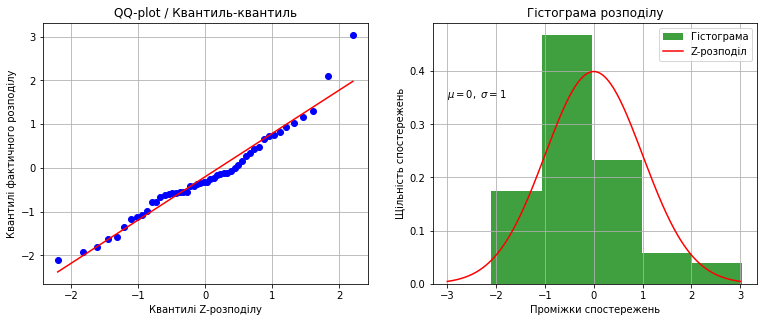

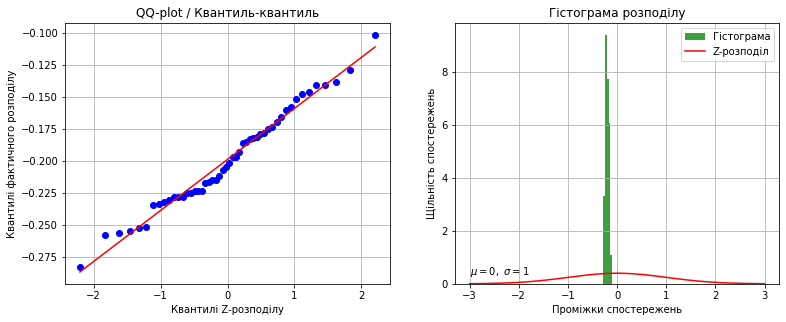

In [38]:
def QQ_and_hist(sample):
    plt.figure(figsize = [6.4*2, 4.8])  # Створюємо фігуру qq_plot
    plt.subplot(1, 2, 1)
    stats.probplot(sample, dist="norm", plot=plt)  # Створюємо графік QQ-plot за допомогою функції пошуку 
    #квантелів значень нашого розподілу

    plt.title('QQ-plot / Квантиль-квантиль')  # Заголовок
    plt.xlabel('Квантилі Z-розподілу')  # Підпис по осі X
    plt.ylabel('Квантилі фактичного розподілу')  # Підпис по осі Y
    plt.grid(True)  # Увімкнути сітку


    # Побудуємо гістограму
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(sample, 5, density=True, facecolor='g', alpha=0.75, label='Гістограма')  # Cтроим гистограмму
    plt.title('Гістограма розподілу')  # Заголовок
    plt.xlabel('Проміжки спостережень')  # Підпис по осі X
    plt.ylabel('Щільність спостережень')  # Підпис по осі Y
    plt.text(-3, 0.35, r'$\mu=0,\ \sigma=1$')  # Текстовий підпис
    plt.grid(True)  # Увімкнути сітку


    # Побудуємо поверх гістограми графік Z-розподілу
    x = np.linspace(mean - 3*sd, mean + 3*sd, 1000)  # Створюємо масив значень Z-розподілу
    plt.plot(x, stats.norm.pdf(x, mean, sd), color='red', label='Z-розподіл')  # Будуємо графік Z-розподілу
    plt.legend()  # Показати легенду
    plt.show()
    
QQ_and_hist(sample)
QQ_and_hist(sample_two)

<p id="part4"></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">U-критерій Манна-Уітні</p>

<p style="text-align: right;"><a href="#part0" style="color:lime; text-decoration:none;">зміст</a></p>

[Умови застосування](https://statpsy.ru/mana-uitni/u-manna-uitni/):


* Порівнювані значення **НЕ** становлять пару **корелюючих значень**
* Розподіл ознак у кожній вибірці може **НЕ** відповідати **нормальному розподілу**

Альтернатива: t-критерій Стьюдента для незалежних вибірок (якщо розподіл ознак ВІДПОВІДАЄ нормальному)

**Для застосування U-критерію Манна — Уітні треба зробити такі операції:**

Скласти єдиний ранжований ряд з обох вибірок, що зіставляються, розставивши їхні елементи за мірою наростання ознаки і приписавши меншому значенню менший ранг. Загальна кількість рангів вийде рівною:

$$\displaystyle N=n_{1}+n_{2},$$

де $\displaystyle n_{1}$ — кількість одиниць в першій вибірці, а $\displaystyle n_{2}$ — кількість одиниць в другій вибірці.

Розділити єдиний ранжований ряд на два, що складаються відповідно з одиниць першої і другої вибірок. Підрахувати окремо суму рангів, що припали на долю елементів першої вибірки, і окремо — на долю елементів другої вибірки. Визначити більшу з двох рангових сум 
($\displaystyle T_{x}$), таку, що відповідає вибірці з $\displaystyle n_{x}$ одиниць.

Визначити значення U -критерію Манна — Уітні за формулою:
$$\displaystyle U=n_{1}\cdot n_{2}+{\frac {n_{x}\cdot (n_{x}+1)}{2}}-T_{x}.$$

За таблицею для обраного рівня статистичної значущості визначити критичне значення критерію для даних $\displaystyle n_{1}$  і $\displaystyle n_{2}$. Якщо набуте значення $\displaystyle U$  менше табличного або дорівнює йому, то визнається наявність істотної відмінності між рівнем ознаки в даних вибірках (приймається альтернативна гіпотеза). Якщо ж набуте значення $\displaystyle U$  більше за табличне, приймається нульова гіпотеза. Достовірність відмінностей тим вище, чим менше значення $\displaystyle U$ .
При справедливості нульової гіпотези критерій має математичне сподівання 
$$\displaystyle M(U)={\frac {n_{1}\cdot n_{2}}{2}}$$
 і дисперсію $$\displaystyle D(U)={\frac {n_{1}\cdot n_{2}\cdot (n_{1}+n_{2})}{12}}$$

 і при достатньо великому об'ємі вибіркових даних $$\displaystyle (n_{1}>19,\;n_{2}>19)$$

 розподілений практично нормально.
 
 <a href='https://www.academia.edu/12076128/Условия_применимости_критериев_Стьюдента_и_Манна_Уитни_Conditions_for_Student_T_Test_and_Mann_Whitney_U_Test_Application_'>Стаття:"Умови застосування критеріїв Стьюдента і Манна-Уітні"</a>

In [39]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
stats.mannwhitneyu(sample,sample_two) # Out:MannwhitneyuResult(statistic=, pvalue=)

MannwhitneyuResult(statistic=1102.0, pvalue=0.3092302962615101)